In [62]:
!pip install transformers torch
!pip install -U sentence-transformers
!!pip install -U sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


['Requirement already satisfied: sentence-transformers in /Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages (5.0.0)',
 'Requirement already satisfied: transformers<5.0.0,>=4.41.0 in /Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages (from sentence-transformers) (4.53.2)',
 'Requirement already satisfied: tqdm in /Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages (from sentence-transformers) (4.67.1)',
 'Requirement already satisfied: torch>=1.11.0 in /Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages (from sentence-transformers) (2.7.1)',
 'Requirement already satisfied: scikit-learn in /Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages (from sentence-transformers) (1.6.1)',
 'Requirement already satisfied: scipy in /Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages (from sentence-transformers) (1.13.1)',
 'Requirement already satisfied: huggingface-hub>=0.20.0

In [86]:
# Import the BERT tokenizer and model from the Hugging Face Transformers library
from transformers import BertTokenizer, BertModel

# Import PyTorch for tensor operations and model handling
import torch

In [89]:
# cased Vs Uncased usecase
"""
bert-base-uncased : lowercase-based model.
automatically lowercases input text during preprocessing.
when to use : for general text, social media, blogs 



 bert-base-cased: preserve case =distinguishes between "Apple" and "apple".
 For formal texts where case matters (e.g. legal documents, academic writing)
 
"""


'\nbert-base-uncased : lowercase-based model.\nautomatically lowercases input text during preprocessing.\nwhen to use : for general text, social media, blogs \n\n\n\n bert-base-cased: preserve case =distinguishes between "Apple" and "apple".\n For formal texts where case matters (e.g. legal documents, academic writing)\n\n'

In [87]:
# Load the pre-trained BERT tokenizer (uncased means it lowercases the input text)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Load the pre-trained BERT model (uncased version does not distinguish between uppercase and lowercase letters)
model = BertModel.from_pretrained("bert-base-uncased")

In [90]:
# Define an input sentence for embedding
sentence = "Natural language processing with BERT is powerful."

In [94]:
#tokenizer(sentence) : tokenizes the input sentence and converts it into input IDs attention masks, etc..which are sutiabe for BERT Input
#return_tensors="pt" : specifieds that the ouput should be returned as Pytorch tensors


inputs = tokenizer(sentence, return_tensors="pt")

In [96]:
print("Tokenized input:", inputs)

Tokenized input: {'input_ids': tensor([[  101,  3019,  2653,  6364,  2007, 14324,  2003,  3928,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


In [95]:
#Code that feeds tokenized input into the BERT model and gets the output without computing gradients.=>commonly used during inference to save memory and improve speed
with torch.no_grad():
    outputs = model(**inputs)

In [93]:
# Extract the last hidden states from the BERT model outputs
last_hidden_state = outputs.last_hidden_state

In [97]:
print("Last hidden state shape:", last_hidden_state.shape)

Last hidden state shape: torch.Size([1, 10, 768])


In [98]:
#Get sentence embedding by averaging token embeddings
sentence_embedding = last_hidden_state.mean(dim=1)
print("Sentence embedding shape:", sentence_embedding.shape)
print("Sentence embedding vector:", sentence_embedding)

Sentence embedding shape: torch.Size([1, 768])
Sentence embedding vector: tensor([[-1.8205e-01, -1.6093e-01, -9.7175e-02, -5.2943e-02, -6.4816e-02,
         -3.3049e-01,  2.7304e-02,  1.0914e-01,  1.5026e-01, -1.7985e-01,
          1.6738e-01,  1.6320e-01, -1.4862e-01, -2.1214e-02, -7.8417e-02,
          9.9738e-02, -3.9616e-02,  2.0594e-01, -3.1564e-01,  1.7193e-01,
          2.1439e-01,  2.2465e-01, -2.0546e-02,  6.3377e-02,  4.0805e-01,
         -2.7396e-01, -6.9383e-02, -2.1405e-01, -4.1650e-01, -3.9559e-01,
         -8.1921e-02,  1.9791e-01, -6.2213e-03, -2.6204e-01, -1.9371e-01,
         -3.0635e-04,  1.1528e-02, -2.0750e-01, -3.2336e-01, -1.1382e-01,
         -4.8359e-01, -1.5777e-01, -4.4500e-02,  8.9135e-02, -2.1312e-01,
         -5.5097e-02, -2.0304e-01,  1.9381e-01,  2.2825e-01, -9.3428e-02,
         -9.6503e-01,  9.8580e-02,  1.5362e-01,  2.8191e-01,  1.2787e-01,
          4.0135e-01,  1.4963e-02, -6.6243e-01,  3.2891e-01, -2.2384e-01,
          3.7148e-02,  9.6243e-02, -2.

In [70]:
print("Embedding shape:", sentence_embedding.shape)
print("First 5 dimensions:\n", sentence_embedding[0][:5])

Embedding shape: torch.Size([1, 768])
First 5 dimensions:
 tensor([-0.1820, -0.1609, -0.0972, -0.0529, -0.0648])


In [99]:
#batch processing
sentences = [
    "I love natural language processing.",
    "BERT models are very useful.",
    "Transformers can understand context.",
    "Cats sit on the mat.",
]

In [72]:
embeddings = []

In [100]:
#Sentences inside sentences are processed one by one in the for loop. 
for sent in sentences:
    #Each sentence is tokenized by tokenizer(sent, return_tensors="pt"), converting it into PyTorch tensor format.
    tokens = tokenizer(sent, return_tensors="pt")
    #to disable gradient calculation, so the model runs only inference. 
    with torch.no_grad():
        #unpacks the tokenized input dictionary as keyword arguments into the BERT model. 
        output = model(**tokens)
        #Taking mean over tokens , produces sentence embedding vector 
    vec = torch.mean(output.last_hidden_state, dim=1)
    #append embedding vector
    embeddings.append(vec)

In [101]:
# # Convert list of tensors to a single tensor, then convert to NumPy array
embedding_vectors = torch.cat(embeddings).numpy()

In [102]:
print("All Embeddings Shape:", embedding_vectors.shape)

All Embeddings Shape: (8, 768)


In [83]:
#PCA
"""
purpose : Projects the data onto the directions with the highest variance
method : Linear transformation
Computation Speed : Fast
Interpretation : Principal components reflect the overall structure of the data
Characteristic : Preserves global structure, focuses more on direction than clustering
output: Always the same (deterministic)
"""

'\npurpose : Projects the data onto the directions with the highest variance\nmethod : Linear transformation\nComputation Speed : Fast\nInterpretation : Principal components reflect the overall structure of the data\nCharacteristic : Preserves global structure, focuses more on direction than clustering\noutput: Always the same (deterministic)\n'

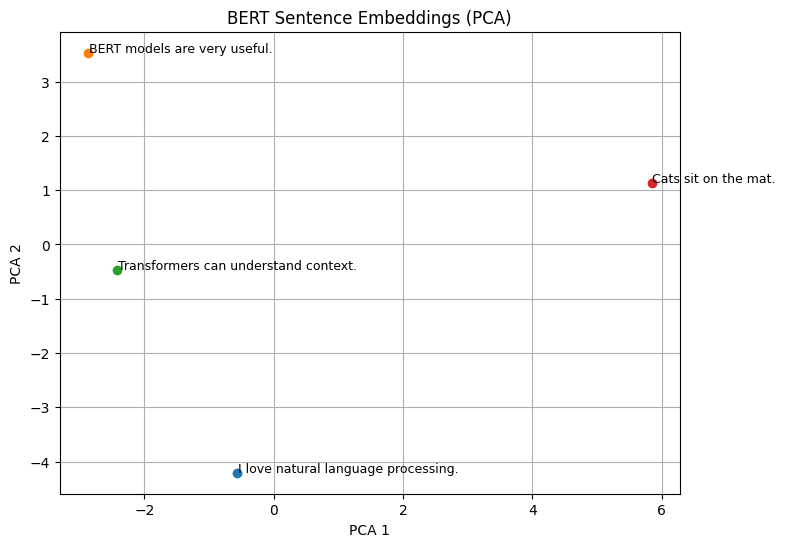

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce embeddings to 2D using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(embedding_vectors)

# Visualization of reduced embeddings
plt.figure(figsize=(8, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced[i]  # Get 2D coordinates for each sentence
    plt.scatter(x, y)  # Plot the point
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=9)  # Annotate with sentence text
plt.title("BERT Sentence Embeddings (PCA)")
plt.xlabel("PCA 1")  # First principal component
plt.ylabel("PCA 2")  # Second principal component
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot


In [106]:
#cosine Similarity

In [107]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate cosine similarity matrix between sentence embeddings
cos_sim_matrix = cosine_similarity(embedding_vectors)

# Print the similarity matrix rounded to 3 decimal places
print("Cosine Similarity Matrix:")
print(np.round(cos_sim_matrix, 3))



Cosine Similarity Matrix:
[[1.    0.6   0.656 0.565 1.    0.6   0.656 0.565]
 [0.6   1.    0.692 0.531 0.6   1.    0.692 0.531]
 [0.656 0.692 1.    0.548 0.656 0.692 1.    0.548]
 [0.565 0.531 0.548 1.    0.565 0.531 0.548 1.   ]
 [1.    0.6   0.656 0.565 1.    0.6   0.656 0.565]
 [0.6   1.    0.692 0.531 0.6   1.    0.692 0.531]
 [0.656 0.692 1.    0.548 0.656 0.692 1.    0.548]
 [0.565 0.531 0.548 1.    0.565 0.531 0.548 1.   ]]


In [108]:
#TSE
"""
Purpose :Visualizes data so that nearby points stay closer together
Method : Nonlinear transformation
Computation Speed: Slow (computationally intensive)
Interpretation: Shows structure based on clusters and similarity
Characteristic:	Preserves local structure very well
Output: Slightly different results each run (can be fixed with random_state)
"""

'\nPurpose :Visualizes data so that nearby points stay closer together\nMethod : Nonlinear transformation\nComputation Speed: Slow (computationally intensive)\nInterpretation: Shows structure based on clusters and similarity\nCharacteristic:\tPreserves local structure very well\nOutput: Slightly different results each run (can be fixed with random_state)\n'

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

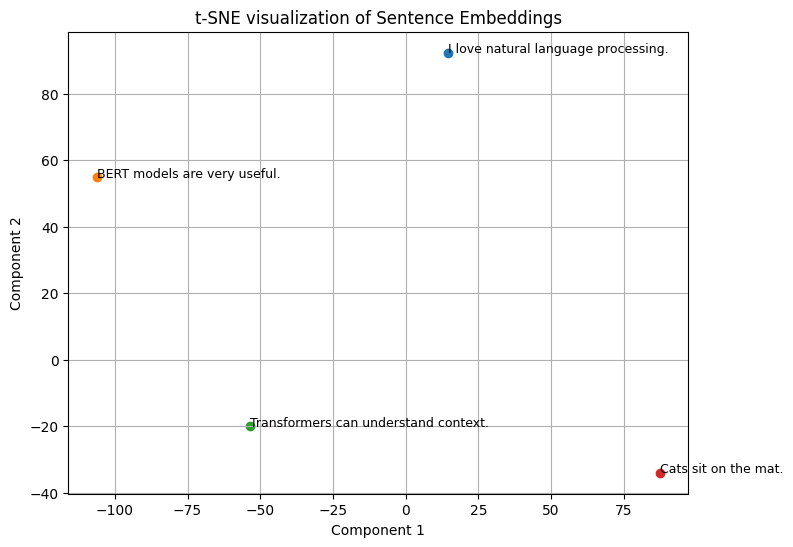

In [109]:
# When the number of sentences is small, set perplexity to a small value
tsne = TSNE(n_components=2, perplexity=3, random_state=42)

# Perform t-SNE dimensionality reduction on the embeddings
reduced_tsne = tsne.fit_transform(embedding_vectors)

plt.figure(figsize=(8,6))
for i, sentence in enumerate(sentences):
    x, y = reduced_tsne[i]  # Get 2D coordinates for each sentence
    plt.scatter(x, y)        # Plot the point
    plt.text(x+0.01, y+0.01, sentence, fontsize=9)  # Annotate with sentence text
plt.title("t-SNE visualization of Sentence Embeddings")
plt.xlabel("Component 1")  # First t-SNE component
plt.ylabel("Component 2")  # Second t-SNE component
plt.grid(True)             # Show grid
plt.show()                 # Display the plot






In [85]:
#PCA vs TSNE
"""
When to use :
Understanding overall direction/variance of data ->PCA
Want to see how close similar points are -> t-SNE
Want to visually identify clusters ->  t-SNE
When speed is important->PCA
"""

'\nWhen to use :\nUnderstanding overall direction/variance of data ->PCA\nWant to see how close similar points are -> t-SNE\nWant to visually identify clusters ->  t-SNE\nWhen speed is important->PCA\n'